In [0]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from scipy.special import expit
from sklearn.model_selection import train_test_split 

In [0]:
n_samples = 1000
np.random.seed(0)
X = np.random.normal(size=n_samples)
y = (X > 0).astype(np.float)
X[X > 0] *= 4
X += .3 * np.random.normal(size=n_samples)
X = X[:, np.newaxis]

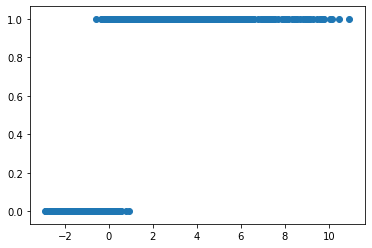

In [0]:
plt.scatter(X, y)
plt.show()

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [0]:
# Fit the classifier
clf = linear_model.LogisticRegression(C=1e5, solver='lbfgs')
clf.fit(X_train, y_train)


LogisticRegression(C=100000.0, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
clf.score(X_test,y_test)

0.935

In [0]:
y_pred = clf.predict(X_test)

In [0]:
# plt.scatter(X_test, y_pred)
# plt.show()

In [0]:
clf2 = linear_model.LinearRegression()
clf2.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
clf2.score(X_test,y_test)

0.4945372794627414

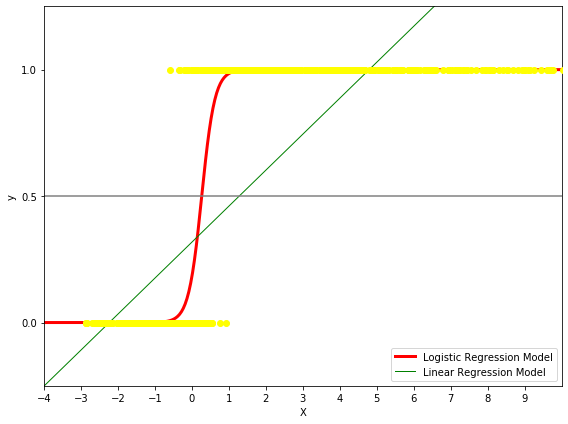

In [0]:
plt.figure(1, figsize=(8, 6))
plt.clf()
plt.scatter(X.ravel(), y, color='yellow', zorder=20)

X_test = np.linspace(-5, 10, 300)

loss = expit(X_test * clf.coef_ + clf.intercept_).ravel()
plt.plot(X_test, loss, color='red', linewidth=3)

plt.plot(X_test, clf2.coef_ * X_test + clf2.intercept_, linewidth=1, color='green',)
plt.axhline(.5, color='.5')

plt.ylabel('y')
plt.xlabel('X')
plt.xticks(range(-5, 10))
plt.yticks([0, 0.5, 1])
plt.ylim(-.25, 1.25)
plt.xlim(-4, 10)
plt.legend(('Logistic Regression Model', 'Linear Regression Model'),
           loc="lower right", fontsize='medium')
plt.tight_layout()
plt.show()
